<a href="https://colab.research.google.com/github/q1ngyM/Github_Colab/blob/main/Dict/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

获取数据集

In [37]:
from google.colab import drive
import csv
# 获取多列的数据
with open('drive/MyDrive/Data/data.csv',encoding='utf-8') as data:
    reader = data.readlines()[1:]
    data_set = [l.rstrip().split(',') for l in reader]

data_set = np.array(data_set).astype(float)


In [ ]:
# 抽取样本，可视化

yes = [s for s in data_set if s[2] == 1]
yes = np.array(yes)
no = [s for s in data_set if s[2] == 0]
no = np.array(no)

plt.figure()
plt.title('Dataset Display')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(yes[:,0],yes[:,1],s=None,c='b',marker = 'o',label = 'purchased')
plt.scatter(no[:,0],no[:,1],s=None,c='r',marker = 'o',label = 'not purchased')
plt.legend(loc='best', prop={'size': 12})
plt.show()

In [43]:
# 根据7:3的比例划分训练集和验证集
train_size = int(0.7 *len(data_set))

training_idx = np.random.choice(len(data_set), train_size, replace=False)
testing_idx = np.array([i for i in range(len(data_set)) if i not in training_set])

training_set = data_set[training_idx]
testing_set = data_set[testing_idx]


In [86]:
# 获取训练集、测试集以及相应标签
X_train = training_set[:,:2]
y_train = training_set[:,2]

X_test = testing_set[:,:2]
y_test = training_set[:,2]

In [140]:
# Perceptron
class Perceptron():
  def __init__(self,X,y,lr):
    self.X = X
    self.y = y
    self.lr = lr # learning rate

  def perceptron(self, epochs):
    weight = np.ones(self.X.shape[1]) # initiate a weight vector
    bias = 0

    epoch = []
    loss = []
    count = 0
    mistake = True # check if mistake occurred

    while mistake and count < epochs:
      mistake = False
      count += 1
      for i in range(len(self.X)):
        if self.y[i] == 0:
          y = -1
        else:
          y = 1
        if y * (np.dot(weight, self.X[i]) + bias) <= 0: # step function
          weight += self.lr * y * self.X[i] # update weight
          bias += self.lr * y

          mistake = True
      epoch.append(float(count))
      loss.append(float(self.test(weight, bias)))
    print(loss)


    return weight, bias, epoch, loss

  def test(self, weight, bias):
    # The amount of wrong classification
    count = 0
    for i in range(len(X)):
      if self.y[i] == 0:
            _y = -1
      else:
            _y = 1
      if _y * (np.dot(weight, self.X[i]) + bias) <= 0:
        count += 1

    return count/(len(X))



[0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571, 0.6071428571428571,

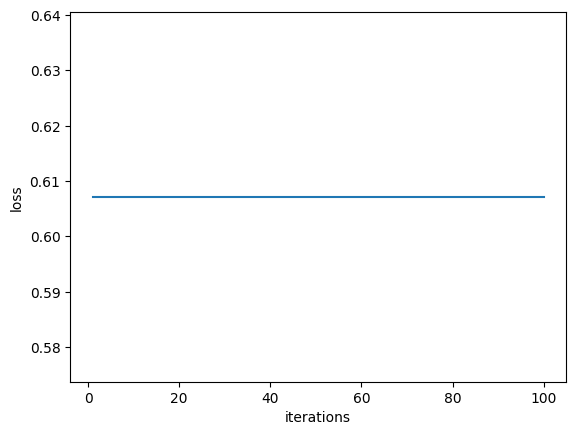

In [141]:
p = Perceptron(X_train, y_train, 1)
weight, bias, epoch, loss= p.perceptron(epochs=100)

print(weight,bias)
plt.figure()
# plt.title('loss')
plt.xlabel("iterations")
plt.ylabel("loss")
#color in cnblogs.com/qccc/p/12795541.html
#orange、teal、red、chocolate
plt.plot(epoch, loss)
plt.show()


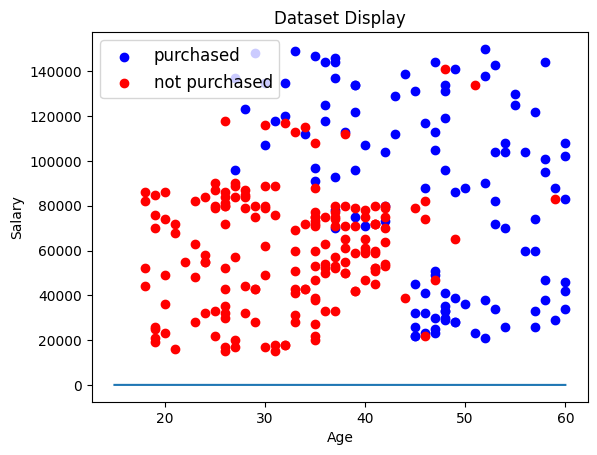

In [121]:
yes = [s for s in training_set if s[2] == 1]
yes = np.array(yes)
no = [s for s in training_set if s[2] == 0]
no = np.array(no)

plt.title('Dataset Display')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(yes[:,0],yes[:,1],s=None,c='b',marker = 'o',label = 'purchased')
plt.scatter(no[:,0],no[:,1],s=None,c='r',marker = 'o',label = 'not purchased')
plt.legend(loc='best', prop={'size': 12})


x = np.linspace(15, 60)
y = -(weight[1]*x + bias)/weight[0]
plt.plot(x, y)


The activation function of perceptron is `step funtion`.
